In [18]:
import pandas as pd
import numpy as np
import math
from scipy.stats import norm
import matplotlib.pyplot as plt
import matplotlib
import statsmodels.api as sm 
import matplotlib.pyplot as plt
from datetime import datetime
import datetime
import seaborn as sns

In [2]:
# return at each bucket, the difference between BS delta PnL and MV delta PnL
def moneynessVsTimeToMaturity(df):
    timeToMaturity = ['8','9','10','13','14','15','16','17','20','21','22','23','24','27']
    moneyness = ['<0.05','0.05-0.1','01-0.15','0.15-0.2','0.2-0.25','0.25-0.3','0.3-0.35',
                            '0.35-0.4','0.4-0.45','0.45-0.5','0.5-0.55','0.55-0.6','0.6-0.65','0.65-0.7',
                            '0.7-0.75','0.75-0.8','0.8-0.85','0.85-0.9','0.9-0.95','>0.95']
    res = pd.DataFrame(index = moneyness, columns = timeToMaturity)
    for time in timeToMaturity:
        t = int(time)
        i = 0
        while i<1:
            df_tmp = df[(abs(df['days_to_expiry'] - t) <0.05)]
            df_tmp = df_tmp[df_tmp['delta']>i]
            df_tmp = df_tmp[df_tmp['delta']<=i+0.05]
            tmp = df_tmp['BS delta PnL'].sum()/len(df_tmp['BS delta PnL']) - df_tmp['MV delta PnL'].sum()/len(df_tmp['MV delta PnL'])
            res.iloc[int(round(i/0.05))][time] = tmp
            #print(f'generating {time}, and {i} and {int(round(i/0.05))} data: {tmp}')
            i = i+0.05
            
    return res

In [26]:
def heatmap(data, row_labels, col_labels, ax=None,
            cbar_kw={}, cbarlabel="",xlabel = 'Time to maturity', ylabel = 'Moneyness', **kwargs):
    """
    Create a heatmap from a numpy array and two lists of labels.

    Parameters
    ----------
    data
        A 2D numpy array of shape (M, N).
    row_labels
        A list or array of length M with the labels for the rows.
    col_labels
        A list or array of length N with the labels for the columns.
    ax
        A `matplotlib.axes.Axes` instance to which the heatmap is plotted.  If
        not provided, use current axes or create a new one.  Optional.
    cbar_kw
        A dictionary with arguments to `matplotlib.Figure.colorbar`.  Optional.
    cbarlabel
        The label for the colorbar.  Optional.
    **kwargs
        All other arguments are forwarded to `imshow`.
    """

    if not ax:
        ax = plt.gca()

    # Plot the heatmap
    im = ax.imshow(data, **kwargs)

    # Create colorbar
    cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
    cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")

    # Show all ticks and label them with the respective list entries.
    ax.set_xticks(np.arange(len(timeToMaturity)))
    ax.set_yticks(np.arange(len(moneyness)))
    ax.set_xticklabels(timeToMaturity)
    ax.set_yticklabels(moneyness)

    # Let the horizontal axes labeling appear on top.
    ax.tick_params(top=True, bottom=False,
                   labeltop=True, labelbottom=False)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=-30, ha="right",
             rotation_mode="anchor")

    # Turn spines off and create white grid.
    #ax.spines[:].set_visible(False)

    ax.set_xticks(np.arange(data.shape[1]+1)-.5, minor=True)
    ax.set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)
    ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
    ax.tick_params(which="minor", bottom=False, left=False)
    
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    
    return im, cbar

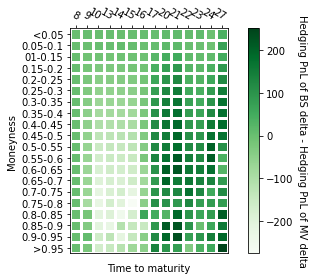

In [38]:
fig, ax = plt.subplots()
im, cbar = heatmap(tmp, moneyness, timeToMaturity, ax=ax,
                   cmap="Greens", 
                   cbarlabel="Hedging PnL of BS delta - Hedging PnL of MV delta", 
                   xlabel = 'Time to maturity', ylabel = 'Moneyness')
#texts = annotate_heatmap(im, valfmt="{x:.1f} t")

fig.tight_layout()
plt.show()

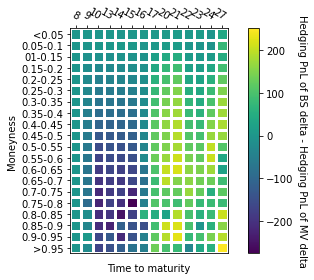

In [76]:
resList095 = ['Hedging PnL result treshold 095 holding 1day.csv',
             'Hedging PnL result treshold 095 holding 3day.csv',
             'Hedging PnL result treshold 095 holding 5day.csv',
             'Hedging PnL result treshold 095 holding 7day.csv']
df = pd.read_csv(resList095[3])
df = df.reset_index()
#df
tmp = moneynessVsTimeToMaturity(df)
tmp = tmp.astype(float, errors = 'raise')
tmp = tmp.to_numpy()

fig, ax = plt.subplots()
im, cbar = heatmap(tmp, moneyness, timeToMaturity, ax=ax,
                   #cmap="Greens", 
                   cbarlabel="Hedging PnL of BS delta - Hedging PnL of MV delta", 
                   xlabel = 'Time to maturity', ylabel = 'Moneyness')
#texts = annotate_heatmap(im, valfmt="{x:.1f} t")

fig.tight_layout()
plt.show()

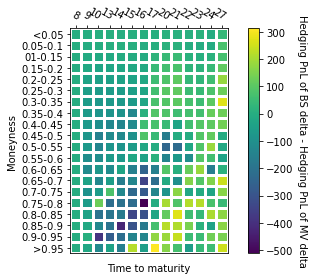

In [80]:
resList085 = ['Hedging PnL result treshold 085 holding 1day.csv',
             'Hedging PnL result treshold 085 holding 3day.csv',
             'Hedging PnL result treshold 085 holding 5day.csv',
             'Hedging PnL result treshold 085 holding 7day.csv']
df = pd.read_csv(resList085[3])
df = df.reset_index()
#df
tmp = moneynessVsTimeToMaturity(df)
tmp = tmp.astype(float, errors = 'raise')
tmp = tmp.to_numpy()

fig, ax = plt.subplots()
im, cbar = heatmap(tmp, moneyness, timeToMaturity, ax=ax,
                   #cmap="Greens", 
                   cbarlabel="Hedging PnL of BS delta - Hedging PnL of MV delta", 
                   xlabel = 'Time to maturity', ylabel = 'Moneyness')
#texts = annotate_heatmap(im, valfmt="{x:.1f} t")

fig.tight_layout()
plt.show()

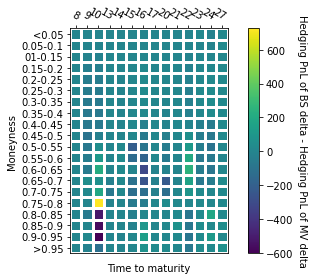

In [86]:
resList075 = ['Hedging PnL result treshold 075 holding 1day.csv',
             'Hedging PnL result treshold 075 holding 3day.csv',
             'Hedging PnL result treshold 075 holding 5day.csv',
             'Hedging PnL result treshold 075 holding 7day.csv']
df = pd.read_csv(resList075[0])
df = df.reset_index()
#df
tmp = moneynessVsTimeToMaturity(df)
tmp = tmp.astype(float, errors = 'raise')
tmp = tmp.to_numpy()

fig, ax = plt.subplots()
im, cbar = heatmap(tmp, moneyness, timeToMaturity, ax=ax,
                   #cmap="Greens", 
                   cbarlabel="Hedging PnL of BS delta - Hedging PnL of MV delta", 
                   xlabel = 'Time to maturity', ylabel = 'Moneyness')
#texts = annotate_heatmap(im, valfmt="{x:.1f} t")

fig.tight_layout()
plt.show()

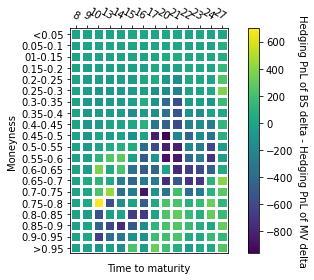

In [89]:
resList065 = ['Hedging PnL result treshold 065 holding 1day.csv',
             'Hedging PnL result treshold 065 holding 3day.csv',
             'Hedging PnL result treshold 065 holding 5day.csv',
             'Hedging PnL result treshold 065 holding 7day.csv']
df = pd.read_csv(resList065[3])
df = df.reset_index()
#df
tmp = moneynessVsTimeToMaturity(df)
tmp = tmp.astype(float, errors = 'raise')
tmp = tmp.to_numpy()

fig, ax = plt.subplots()
im, cbar = heatmap(tmp, moneyness, timeToMaturity, ax=ax,
                   #cmap="Greens", 
                   cbarlabel="Hedging PnL of BS delta - Hedging PnL of MV delta", 
                   xlabel = 'Time to maturity', ylabel = 'Moneyness')
#texts = annotate_heatmap(im, valfmt="{x:.1f} t")

fig.tight_layout()
plt.show()

In [65]:
df = pd.read_csv('Hedging PnL result treshold 065 holding 1day.csv')
df = df.reset_index()
df

,index,Unnamed: 0,contract name,start date,delta,days_to_expiry,iv,BS delta PnL,MV delta PnL,holding period,model stable,MV delta
0,0,0,NIFTY22JAN17450CE,"2021-12-31, 15:25:00",0.491313,27.001042,0.124635,0.000000,0.000000,1,0.0,0.086794
1,1,1,NIFTY22JAN17450CE,"2022-01-01, 15:25:00",0.491313,27.001042,0.124635,0.000000,0.000000,1,0.0,0.086794
2,2,2,NIFTY22JAN17450CE,"2022-01-02, 15:25:00",0.491313,27.001042,0.124635,133.808993,23.638233,1,0.0,0.086794
3,3,3,NIFTY22JAN17450CE,"2022-01-03, 15:25:00",0.642103,24.001042,0.129904,105.080209,56.221721,1,1.0,0.343549
4,4,4,NIFTY22JAN17450CE,"2022-01-04, 15:25:00",0.733483,23.001042,0.125969,66.160157,5.482907,1,1.0,0.060786
...,...,...,...,...,...,...,...,...,...,...,...,...
1395,1395,1395,NIFTY22JAN18750CE,"2022-01-15, 15:25:00",0.145006,13.001042,0.103868,0.000000,0.000000,1,0.0,0.061732
1396,1396,1396,NIFTY22JAN18750CE,"2022-01-16, 15:25:00",0.145006,13.001042,0.103868,8.678611,3.694687,1,0.0,0.061732
1397,1397,1397,NIFTY22JAN18750CE,"2022-01-17, 15:25:00",0.154235,10.001042,0.107177,-34.911067,-13.911622,1,0.0,0.061461
1398,1398,1398,NIFTY22JAN18750CE,"2022-01-18, 15:25:00",0.073853,9.001042,0.124679,-10.387444,-8.456817,1,0.0,0.060127
